# Project Description

# details
The research paper upon which we are basing this is one of the advisor's most recent research papers.
The paper's goal is to develop a conditional probability density function P (X | Z).
Then "optimally transport" it to the unknown P(Y) using gradient descent . 

- The X-variable is the current time series
- The Z variable is the 1-day lagged time series
- The Y-variables is the variable I am solving for. 

The ultimate goal is to program the gaussian kernels like K(y,y i) in equation (10) so that we can create the Conditional Kernel Density Estimation equations (12) and (13).


We intend to use a simple gradient descent algorithm to see how this works; we simply want to implement the idea from Zhao's paper ( https://math.nyu.edu/tabak/publications/TabakTrigilaZhao.pdf ).

# Action Items 

In [1]:
#Action Items 

### About the Dataset

Ever since Yahoo! finance decommissioned their historical data API, many programs that relied on it to stop working.

yfinance aims to solve this problem by offering a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance.

# SGDBFM EDA Phase I :  Understanding the Data

In [2]:
'''
Importing all the needed librairies
'''
#Data Structure, scientific computing and technical computing.
import numpy as np
import pandas as pd
import pandas_datareader.data as web # pip install pandas_datareader

#Scipy: scientific computing
import scipy
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance_matrix
from scipy import stats


#Visualization
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning library for the Python programming language. 
from sklearn.neighbors import KernelDensity

#Dataset
import yfinance as yf #pip install yfinance

#Date formatting
import datetime

In [3]:
'''
Reading the data from yahoo-finance API for:
- the ticker: AAPL 
- Periode: for the last 10 years
'''
data = yf.download("AAPL", period = "10y")
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-13,148.970001,149.440002,148.270004,149.100006,149.100006,59318800
2021-08-16,148.539993,151.190002,146.470001,151.119995,151.119995,103296000
2021-08-17,150.229996,151.679993,149.089996,150.190002,150.190002,92229700
2021-08-18,149.800003,150.720001,146.149994,146.360001,146.360001,86326000
2021-08-19,145.029999,148.000000,144.520004,146.699997,146.699997,81030081


In [4]:
'''
slicing data to just look at closing prices
'''

apple = data["Close"]
apple.head()

Date
2011-08-22    12.730000
2011-08-23    13.342857
2011-08-24    13.435000
2011-08-25    13.347143
2011-08-26    13.699286
Name: Close, dtype: float64

In [5]:
'''
changing data from pandas data series to numpy array
'''
Apple = np.array(apple)

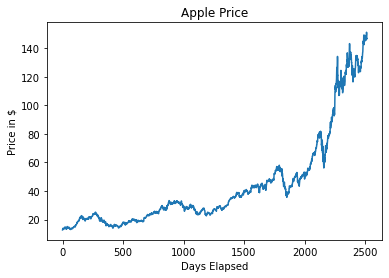

In [6]:
'''
ploting of Apple Price
'''

plt.plot(Apple)
plt.title("Apple Price")
plt.xlabel("Days Elapsed")
plt.ylabel("Price in $")
plt.show()


In [7]:
'''
converting prices to returns
'''
def financial_returns(x):
    return np.diff(x) / x[ : -1]

#Showcasing the conversion
financial_returns(Apple)


array([ 0.0481428 ,  0.0069058 , -0.00653943, ..., -0.006154  ,
       -0.02550104,  0.00232301])

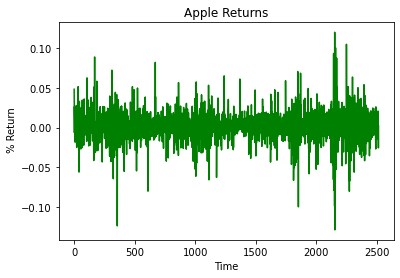

In [8]:
'''
graph of returns
'''
apple_returns = financial_returns(Apple)
plt.plot(apple_returns, "g")
plt.title("Apple Returns")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.show()

In [16]:
'''
Daily and monthly returns 
'''

apple_daily_returns = data['Adj Close'].pct_change()
apple_monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()

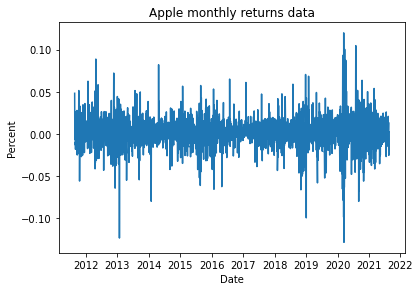

In [14]:
'''
Apple daily returns
'''

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(apple_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Apple monthly returns data")
plt.show()

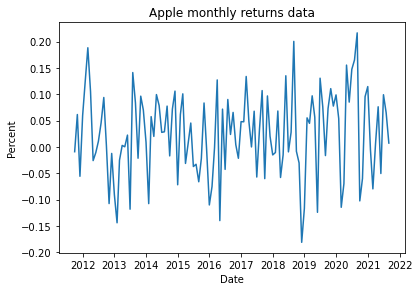

In [15]:
'''
Apple monthly returns
'''
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(apple_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Apple monthly returns data")
plt.show()

After looking at the daily returns chart for Netflix we can conclude that the returns are quite volatile and the stock can move +/- 5% on any given day. To get a sense of how extreme the returns can be we can plot a histogram.

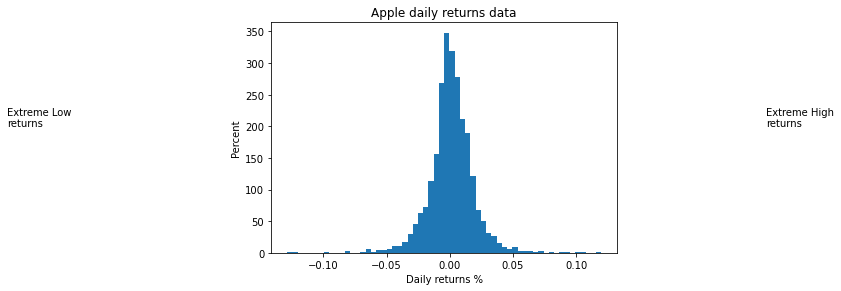

In [17]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
apple_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Apple daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

### Calculating the cumulative returns for the Apple stock

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or in other word, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the **cumprod()** function.

In [18]:
apple_cum_returns = (apple_daily_returns + 1).cumprod()

Next we can chart the cumulative returns of Apple.

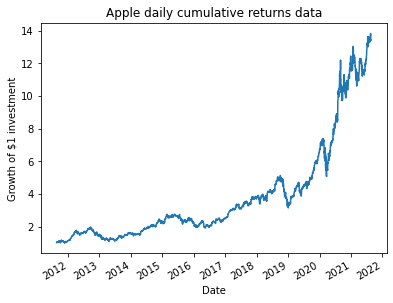

In [19]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
apple_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Apple daily cumulative returns data")
plt.show()

This chart shows the cumulative returns since 2012 for Apple. With the power of hindsight, one could have made $14 on a $1 investment since 2012. That is quite a remarkable performance. But as we know its easier said then done. 

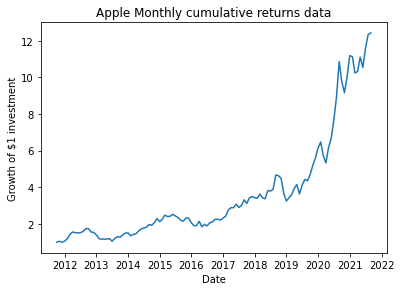

In [20]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
apple_cum_returns = (apple_monthly_returns + 1).cumprod()
ax1.plot(apple_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Apple Monthly cumulative returns data")
plt.show()

We can visualize that the monthly returns chart is much more smoother than the daily chart.

### Comparing the findings with stocks such as Google and Amazon

We can download the financial data for multiple stocks. We first assign the stock symbols to a variable named “tickers”", and use that to download the stock prices.

In [21]:
tickers = ["AMZN", "AAPL", "GOOG"]
multpl_stocks = web.get_data_yahoo(tickers,
start = "2012-01-01",
end = "2021-08-19")

Next we will chart the stock prices for multiple stocks

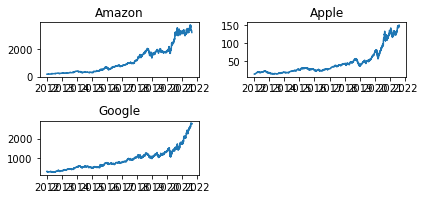

In [25]:
'''
Charting the stock prices for multiple stocks
'''
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)

ax1.plot(multpl_stocks['Adj Close']['AMZN'])
ax1.set_title("Amazon")
ax2.plot(multpl_stocks['Adj Close']['AAPL'])
ax2.set_title("Apple")
ax3.plot(multpl_stocks['Adj Close']['GOOG'])
ax3.set_title("Google")
plt.tight_layout()
plt.show()

Calculating the the returns for multiple stocks is just as easy as the single stock.

In [26]:
'''
Calculating the returns for multiple stocks
'''
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

<Figure size 432x288 with 0 Axes>

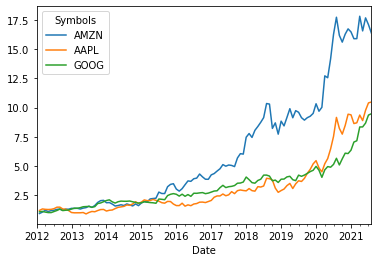

In [27]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

Not surprisingly, Apple had the best returns since 2013. Amazon comes in the first place since the start of the pandemic. The most surprising result is Google that comes in last. It has severely under performed the other stocks in the FAANG group. Maybe the market participants are worried about its spending on the moon shot projects (Google glass, X Labs, Waymo etc). Whether these projects can produce results is yet to be seen.

A contrarian could argue that given the investments in the future projects, Google is currently undervalued an could be the better investment among the FAANG stocks.

### Statistical Data

We already have the daily and monthly returns data for Netflix. Now we we will calculate the daily and monthly mean and standard deviations of the returns. We will use mean() and std() functions for our purpose.

In [32]:
'''
Calculating the Mean, standard deviation and other stats
'''
print("Mean: \n", multpl_stock_monthly_returns.mean())

Mean: 
 Symbols
AMZN    0.027782
AAPL    0.023803
GOOG    0.021560
dtype: float64


In [33]:
print("Standard deviation: \n", multpl_stock_monthly_returns.std())

Standard deviation: 
 Symbols
AMZN    0.081305
AAPL    0.080239
GOOG    0.061358
dtype: float64


In [34]:
'''
Calculating the correlation and covariance using pandas
'''
print(multpl_stock_monthly_returns.corr())

Symbols      AMZN      AAPL      GOOG
Symbols                              
AMZN     1.000000  0.401388  0.537828
AAPL     0.401388  1.000000  0.365305
GOOG     0.537828  0.365305  1.000000


In [35]:
print(multpl_stock_monthly_returns.cov())

Symbols      AMZN      AAPL      GOOG
Symbols                              
AMZN     0.006610  0.002619  0.002683
AAPL     0.002619  0.006438  0.001799
GOOG     0.002683  0.001799  0.003765


# *Machine Learning* - Contribution Phase II :  Implementing SGD and Optimal Transport Algorithm

### a - Gaussian Kernel function

In [36]:
'''
Gaussian Kernel function
'''

def Gaussian_Kernel(x, h):
    return np.exp(-x**2/ 2 * h**2)


Gaussian_Kernel(1, 1)
Gaussian_Kernel(apple_returns, h = 0.1)
print(apple_returns.shape)

(2515,)


In [ ]:
'''
Difference Matrix
'''
difference_matrix = []
for i in range(len(apple_returns)):
    for k in range(len(apple_returns)):
        difference_matrix.append(apple_returns[k] - apple_returns[i])
        M = np.mat(difference_matrix)


In [44]:
q = []
i=0
while(i<25):
    j=0
    while(j<25):
        q.append(Gaussian_Kernel(np.absolute(apple_returns[j]-apple_returns[i]), h=0.1))
        j=j+1
    i=i+1
matrix_qq = np.reshape(q, (25,25))
matrix_q = matrix_qq/np.sum(matrix_qq, axis = 1)


In [41]:
print("The shape of q is: ", np.shape(matrix_q), matrix_q)

The shape of q is:  (25, 25) [[0.04000043 0.03999971 0.03999948 0.04000005 0.03999988 0.03999959
  0.03999936 0.03999942 0.03999927 0.03999986 0.03999978 0.0399996
  0.03999929 0.03999971 0.03999981 0.0399998  0.03999976 0.03999993
  0.04000008 0.03999967 0.03999954 0.03999916 0.0399997  0.03999954
  0.03999942]
 [0.04000009 0.04000005 0.04000004 0.04000007 0.04000006 0.04000005
  0.04000003 0.04000004 0.04000003 0.04000006 0.04000006 0.04000005
  0.04000003 0.04000005 0.04000006 0.04000006 0.04000005 0.04000006
  0.04000007 0.04000005 0.04000004 0.04000002 0.04000005 0.04000004
  0.04000004]
 [0.03999983 0.04000002 0.04000008 0.03999993 0.03999997 0.04000005
  0.04000011 0.04000009 0.04000013 0.03999998 0.04       0.04000005
  0.04000013 0.04000002 0.03999999 0.03999999 0.04000001 0.03999996
  0.03999992 0.04000003 0.04000006 0.04000016 0.04000002 0.04000006
  0.04000009]
 [0.04000033 0.03999998 0.03999986 0.04000015 0.04000006 0.03999992
  0.0399998  0.03999983 0.03999976 0.04000005 

In [42]:
print(type(q))

<class 'list'>


In [ ]:
print(type(M))

In [ ]:
'''
Gaussian Kernel Matrix
'''
GKM = Gaussian_Kernel(M, h=0.1)

GKM1 = GKM/GKM.sum(axis = 1)

#plotting Gaussian Kernel Matrix 1
plt.plot(GKM1)
plt.show()

### b - Smaller Data set to run our experiment:  *(Apple 2/12/21- 4/15/21)*

In [46]:
apple1 = yf.download("AAPL", start = "2011-04-15", end = "2021-04-15")
apple2 = yf.download("AAPL", start = "2011-04-16", end = "2021-04-16")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [49]:
print(type(apple1))
print(type(apple2))
apple1.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-15,11.903571,11.915714,11.671429,11.695000,10.041518,453605600
2011-04-18,11.646429,11.865357,11.434286,11.851786,10.176137,609898800
2011-04-19,11.896429,12.070714,11.846786,12.066429,10.360435,419378400
2011-04-20,12.268214,12.348214,12.196429,12.228929,10.499960,700666400
2011-04-21,12.678571,12.683214,12.447143,12.525000,10.754171,753810400


In [50]:
'''
slicing data to just look at closing prices for Z
'''
apple_data = apple1["Close"]
Time = apple1.copy()
Time['year'], Time['month'], Time['day'] = apple1.index.year, apple1.index.month, apple1.index.day
time_pandas = Time.iloc[:,[-1]]

apple_data.head()

Date
2011-04-15    11.695000
2011-04-18    11.851786
2011-04-19    12.066429
2011-04-20    12.228929
2011-04-21    12.525000
Name: Close, dtype: float64

In [55]:
'''
Slicing data to just look at closing prices for X, changing to numpy array
'''
apple2_data = apple2["Close"]
Apple2 = np.array(apple2_data)

In [56]:
# changing data from pandas data series to numpy array
Apple1 = np.array(apple_data)
time = np.array(time_pandas)

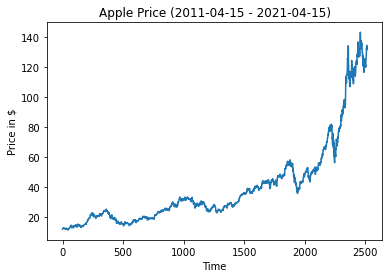

In [57]:
# plot of Apple1 Price
plt.plot(Apple1)
plt.title("Apple Price (2011-04-15 - 2021-04-15)")
plt.xlabel("Time")
plt.ylabel("Price in $")
plt.show()

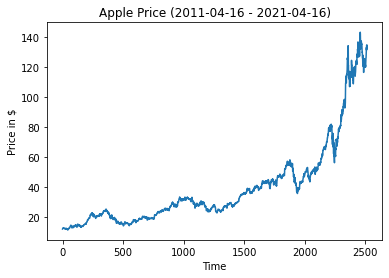

In [58]:
plt.plot(Apple2)
plt.title("Apple Price (2011-04-16 - 2021-04-16)")
plt.xlabel("Time")
plt.ylabel("Price in $")
plt.show()

### c- Derivative Kernel M

### d- Kernel Density of y

### e-  Kernel Density of z

### f-  Conditional Kernel Density Estimation equations 